<h1> ________________________________________________________________________________</h1>
<h1><b>Project UAS IBDA2032 - Kecerdasan Buatan</b></h1>

<h1>Computer Vision</h1>


<b style="font-size:16px;">Anggota Kelompok:</b>

<ul>
    <li>Darren Nathaniel Rusly - 10101190104</li>
    <li>Jose Alfred Benaya - 10101190377</li>
    <li>Reszisca Valentiana - 10101190702</li>
</ul>
<h1> ________________________________________________________________________________</h1>

**Pemanggilan Library**


In [ ]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Softmax
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import time

**Link data Google Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Mendefine data latih, validasi, dan uji**

In [ ]:
train_ds = image_dataset_from_directory('/content/drive/My Drive/data', labels="inferred", label_mode="binary", batch_size=5664,
                                        image_size=(64,64), shuffle=True, validation_split=0.25, subset="training", seed=42)

Found 7552 files belonging to 2 classes.
Using 5664 files for training.


In [ ]:
val_ds = image_dataset_from_directory('/content/drive/My Drive/data', labels="inferred", label_mode="binary", batch_size=1888,
                                       image_size=(64,64), shuffle=True, validation_split=0.25, subset="validation", seed=42)

Found 7552 files belonging to 2 classes.
Using 1888 files for validation.


In [ ]:
test_ds = image_dataset_from_directory('/content/drive/My Drive/data_kelas', labels="inferred", label_mode="binary", 
                                       image_size=(64,64), shuffle=True)

Found 27 files belonging to 2 classes.


In [ ]:
class_names = train_ds.class_names

**Visualisasi contoh data latih**

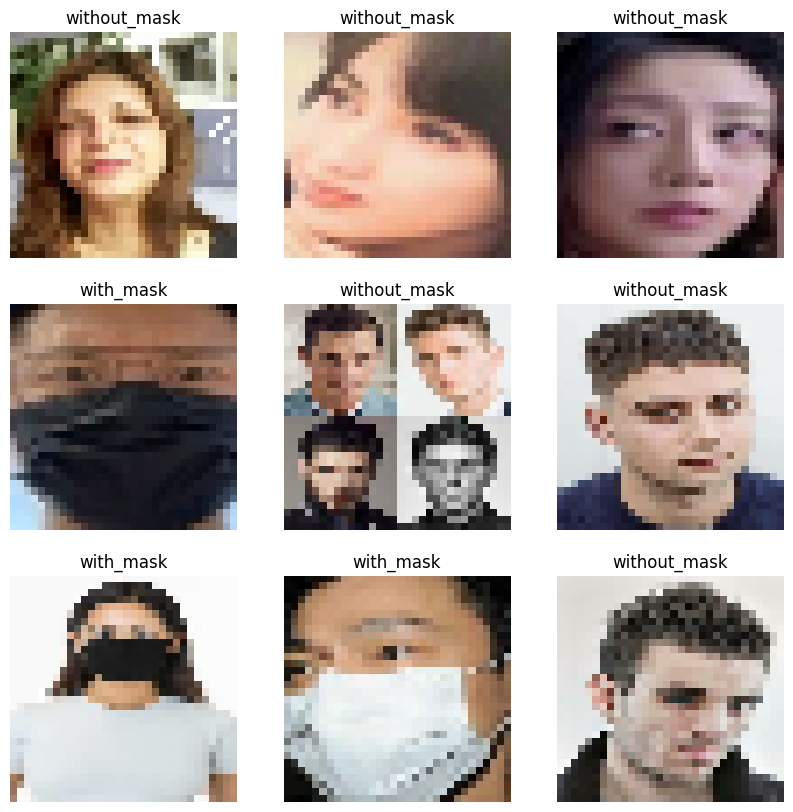

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[int(labels[i])])
    plt.axis("off")

**Membagi setiap jenis data menjadi image dan label**

In [ ]:
for x, y in train_ds:
  train_images = x
  train_labels = y
  break

for i, j in val_ds:
  val_images = i
  val_labels = j
  break

for a, b in test_ds:
  test_images = a
  test_labels = b
  break

train_images.shape, val_images.shape, test_images.shape
  

(TensorShape([5664, 64, 64, 3]),
 TensorShape([1888, 64, 64, 3]),
 TensorShape([27, 64, 64, 3]))

**Pembuatan Model**

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience= 2, mode='min')

model = Sequential([
    Conv2D(filters = 64, kernel_size = (2, 2), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(filters = 32, kernel_size = (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(filters = 64, kernel_size = (2, 2), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(75, activation='relu'),
    Dense(50, activation='relu'),
    Dense(2, activation='softmax')
])

model.compile(optimizer='adam', loss=SparseCategoricalCrossentropy(), metrics=['accuracy'])

**Pelatihan Model**

In [ ]:
start_time = time.time()
history = model.fit(train_images, train_labels, validation_data=(val_images, val_labels), epochs=20, batch_size = 100, callbacks=early_stop)
print("--- %s seconds ---" % (time.time() - start_time))

Epoch 1/20
57/57 [==============================] - 2s 25ms/step - loss: 2.1892 - accuracy: 0.7500 - val_loss: 0.3207 - val_accuracy: 0.8851
Epoch 2/20
57/57 [==============================] - 1s 22ms/step - loss: 0.2592 - accuracy: 0.9008 - val_loss: 0.2862 - val_accuracy: 0.8867
Epoch 3/20
57/57 [==============================] - 1s 22ms/step - loss: 0.2081 - accuracy: 0.9161 - val_loss: 0.2111 - val_accuracy: 0.9258
Epoch 4/20
57/57 [==============================] - 1s 22ms/step - loss: 0.1699 - accuracy: 0.9320 - val_loss: 0.2028 - val_accuracy: 0.9311
Epoch 5/20
57/57 [==============================] - 1s 22ms/step - loss: 0.1399 - accuracy: 0.9447 - val_loss: 0.2068 - val_accuracy: 0.9248
Epoch 6/20
57/57 [==============================] - 1s 22ms/step - loss: 0.1113 - accuracy: 0.9562 - val_loss: 0.1705 - val_accuracy: 0.9375
Epoch 7/20
57/57 [==============================] - 1s 22ms/step - loss: 0.1117 - accuracy: 0.9573 - val_loss: 0.1873 - val_accuracy: 0.9338
Epoch 8/20
57

**Prediksi model terhadap data uji**

In [ ]:
predictions = model.predict(test_images)
predictions.shape

(27, 2)

**Visualisasi hasil prediksi**

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = int(true_label[i]), img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img.numpy().astype("uint8"))

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = int(true_label[i])
  plt.grid(False)
  plt.xticks(range(2))
  plt.yticks([])
  thisplot = plt.bar(range(2), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

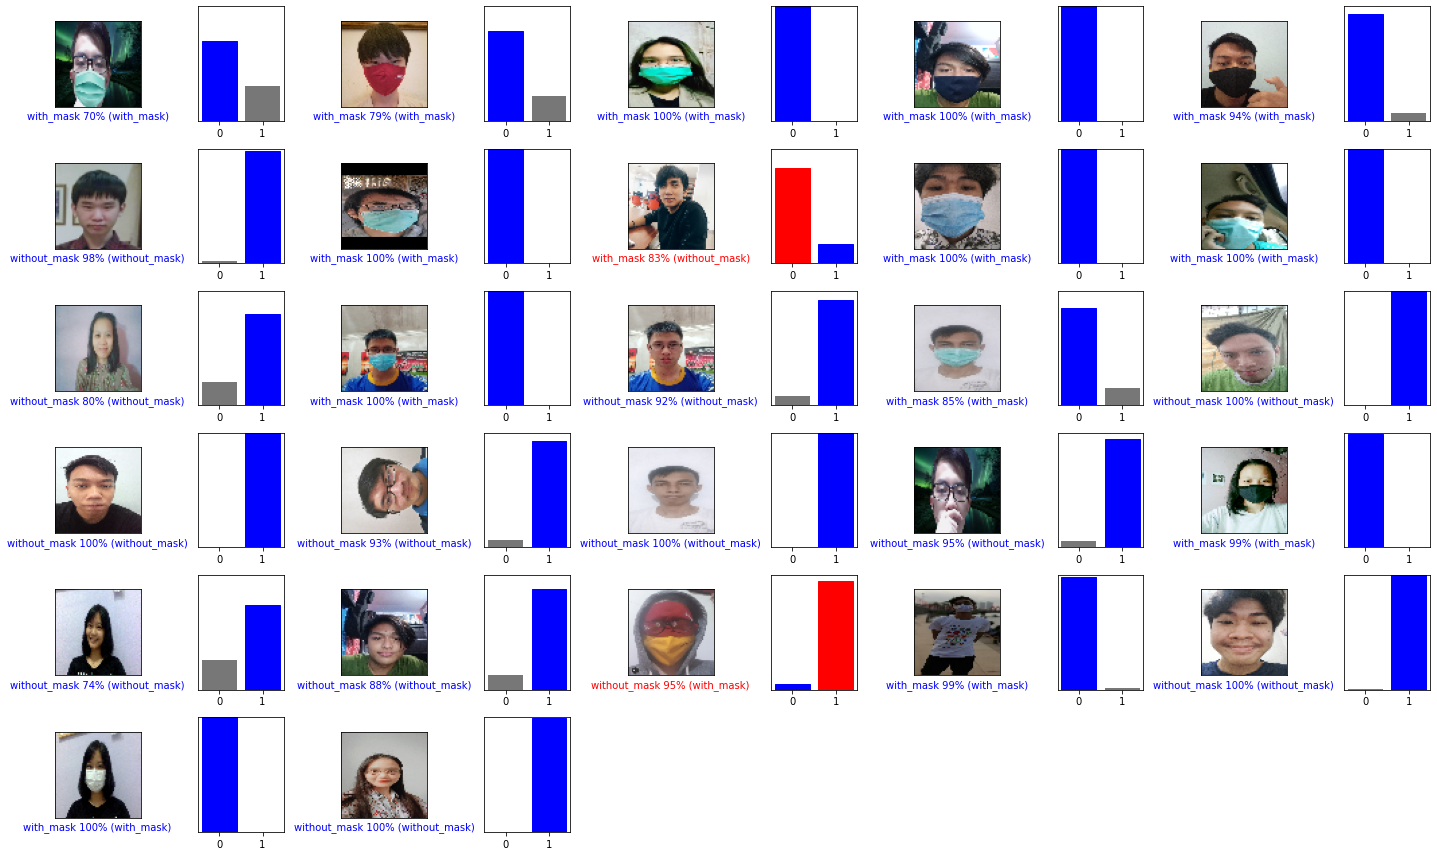

In [ ]:
num_rows = 6
num_cols = 5
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  if i == len(predictions):
    break
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

**Visualisasi loss dan accuracy pada data validasi dan latih pada proses pelatihan**

In [ ]:
def plot_graph(history,string):
    # Mengambil Nilai Accuracy 
    acc = history.history['accuracy']
    epochs = range(len(acc))

    # plot
    plt.figure(figsize=(12,5))
    plt.plot(epochs, history.history[string],label=str(string))
    plt.plot(epochs, history.history["val_"+str(string)],label=str(string))
    plt.title('Training and Validation ' + string)
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string,"val_"+string])
    plt.show()

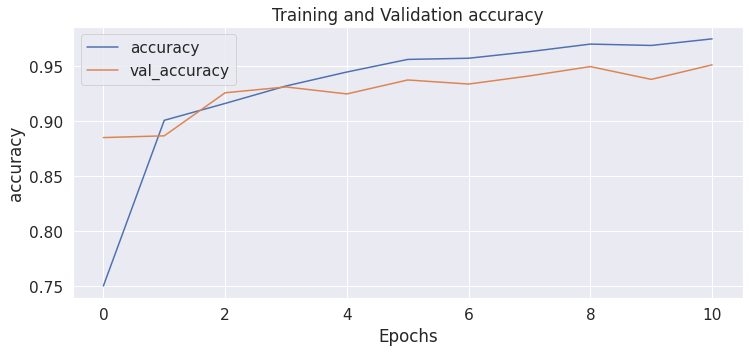

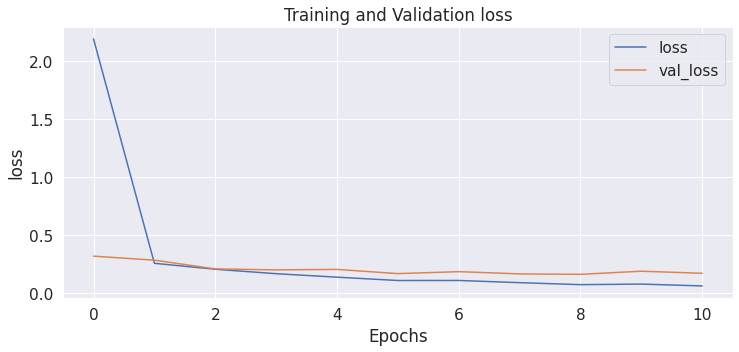

In [ ]:
plot_graph(history,"accuracy")
plot_graph(history,"loss")

**Confusion Matrix**

In [ ]:
true_labels = []
pred_labels = []
for i in range(len(predictions)):
  true_labels.append(int(test_labels[i]))
  pred_labels.append(np.argmax(predictions[i]))
cm = confusion_matrix(true_labels, pred_labels)
cm

array([[13,  1],
       [ 1, 12]])

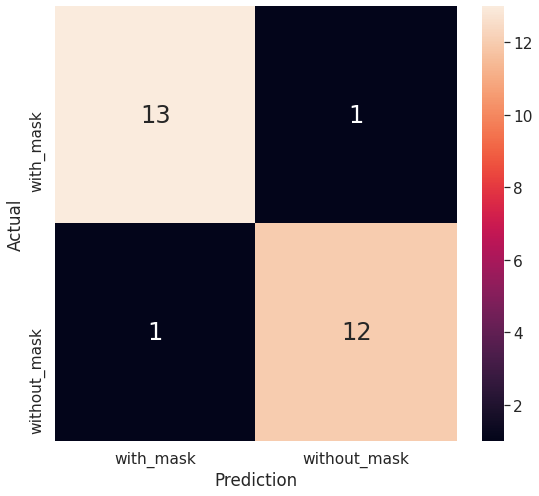

In [ ]:
import seaborn as sns
x_tick = ["with_mask", "without_mask"]
y_tick = ["with_mask", "without_mask"]
plt.figure(figsize=(9,8))
sns.set(font_scale=1.4)
sns.heatmap(cm, annot=True, xticklabels=x_tick, yticklabels=y_tick, annot_kws={"fontsize":24})
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.show()